In [11]:
import random
import cv2 as cv
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from skimage.feature import hog
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from scipy.spatial.distance import euclidean

In [3]:
def load_data():
    X = np.load("/kaggle/input/make-pairs-no-split/X.npy")
    print(X.shape)
    y = np.load("/kaggle/input/make-pairs-no-split/y.npy")
    print(y.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = None)
    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)

    del X
    del y

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = load_data()

(30360, 2, 150, 200)
(30360,)
(21252, 2, 150, 200)
(21252,)
(9108, 2, 150, 200)
(9108,)


## SVM

In [35]:
train_distances_arr = []
hog_dict_train = {}

test_distances_arr = []
hog_dict_test = {}

In [ ]:
for i, pairs in enumerate(X_train[:]):
    if i%1000:
        print(f"Iteration number {i}")
    hog_1, hog_image_1 = hog(pairs[0], visualize = True)
    hog_2, hog_image_2 = hog(pairs[1], visualize = True)
    hog_dict_train[i] = (hog_image_1, hog_image_1)
    distance = euclidean(hog_1, hog_2)
    train_distances_arr.append(distance)
    
print("Train distances computed")

In [28]:
distances_train = np.array(train_distances_arr)
print(distances_train.shape)

(4,)


In [ ]:
for i, pairs in enumerate(X_test[:]):
    if i%1000:
        print(f"Iteration number {i}")
    hog_1, hog_image_1 = hog(pairs[0], visualize = True)
    hog_2, hog_image_2 = hog(pairs[1], visualize = True)
    hog_dict_test[i] = (hog_image_1, hog_image_1)
    distance = euclidean(hog_1, hog_2)
    test_distances_arr.append(distance)
    
print("Test distances computed")

In [9]:
distances_test = np.array(test_distances_arr)
print(distances_test.shape)

(9108,)


In [10]:
def visualize_hog(pairs, labels, hog_dict, to_show=6, num_col=3, predictions=None, test=False):
    
    num_row = 2

    # Plot the images
    fig, axes = plt.subplots(num_row, num_col, figsize=(10, 10))
        
    n = random.randint(0, pairs.shape[0])
    print(f"Index to show: {n}")
    ax[0].imshow(np.concatenate([pairs[n][0], pairs[n][1]], axis=1), cmap="gray")
    ax[1].imshow(np.concatenate([kp_dict[n][0], kp_dict[n][1]], axis=1), cmap="gray")

    if test:
        ax.set_title("True: {} | Pred: {:.5f}".format(labels[n], predictions[n][0]))
    else:
        ax.set_title("Label: {}".format(labels[n]))
    if test:
        plt.tight_layout(rect=(0, 0, 1.9, 1.9), w_pad=0.0)
    else:
        plt.tight_layout(rect=(0, 0, 1.5, 1.5))
    plt.show()


Index to show: 8114


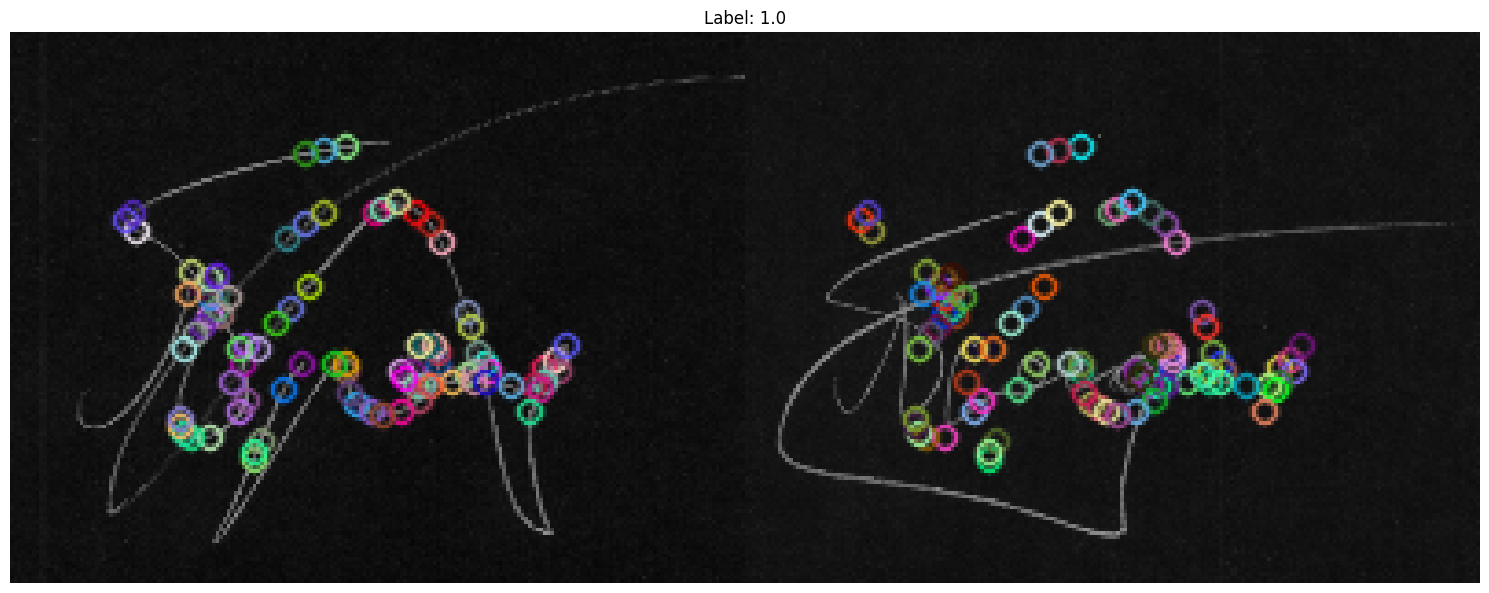

In [11]:
visualize_kp(X_train[:-1], y_train[:-1], hog_dict_train, to_show = 1, num_col = 1)

Index to show: 6094


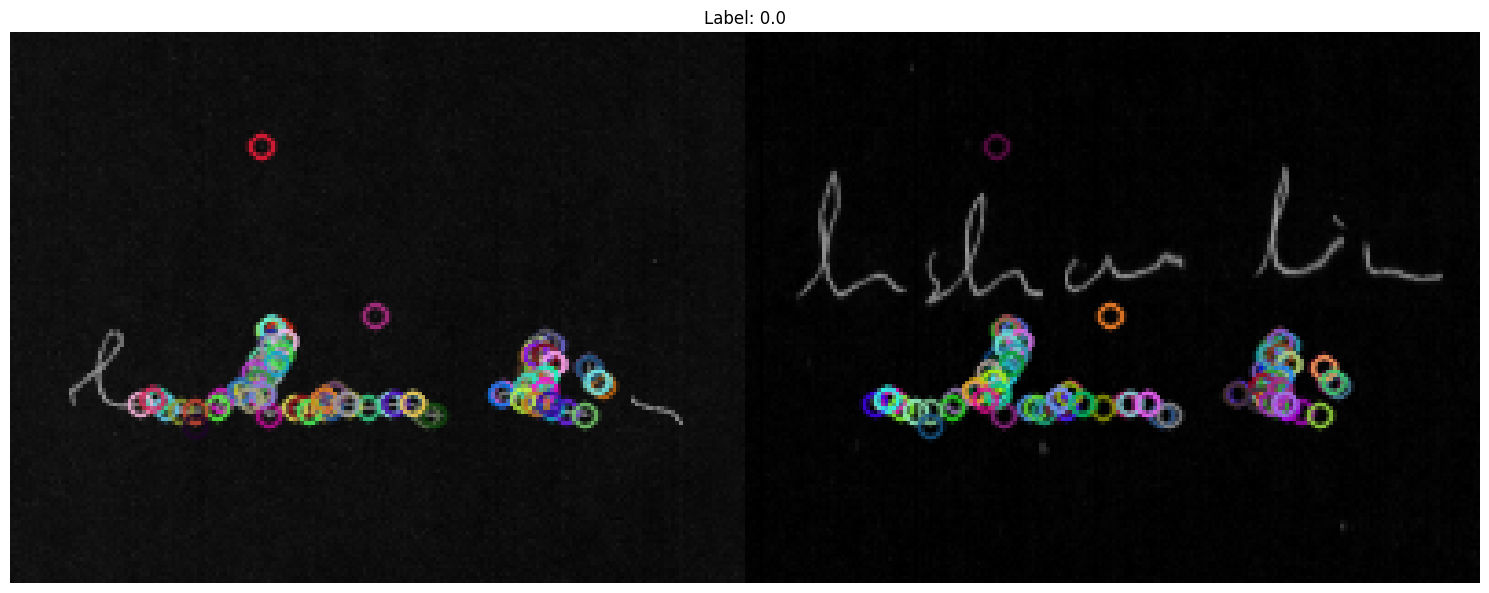

In [12]:
visualize_kp(X_test[:-1], y_test[:-1], hog_dict_test, to_show = 1, num_col = 1)

In [13]:
distances_train_reshape = distances_train.reshape(-1, 1)
print(distances_train_reshape.shape)
distances_test_reshape = distances_test.reshape(-1, 1)
print(distances_test_reshape.shape)

(21252, 1)
(9108, 1)


In [ ]:
svm = SVC(kernel = "linear")
svm.fit(distances_train_reshape, y_train)

In [ ]:
y_pred = svm.predict(distances_test_reshape)

In [ ]:
print("Metrics\n" + classification_report(y_test, y_pred))